In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def optimal_encoding_parameters(mu,sigma,q):
    a = -1/(2*sigma**2)
    b = mu/sigma**2
    c = -mu**2/(2*sigma**2) -torch.log(sigma) - torch.log(q)
    return a,b,c
def encode(a,b,c,x_data):
    #Define probabilities of activation given a vector of stimuli
    p_tilde = torch.matmul(a.reshape(-1,1),x_data.reshape(1,-1)**2) + torch.matmul(b.reshape(-1,1),x_data.reshape(1,-1)) + c[:,None]
    p_j_x = torch.softmax(p_tilde,dim=0)
    return p_j_x


In [45]:
#Stimuli
x_data = torch.distributions.exponential.Exponential(0.5).sample((500,))
x_sorted,indices = x_data.sort()
N = 20;
#Decoding parameters
mu = torch.arange(0,10,10/N);
sigma = 1*torch.ones(N);
q = 1/N*torch.ones(N)
a,b,c = optimal_encoding_parameters(mu,sigma,q)
p_j_x = encode(a,b,c,x_data)

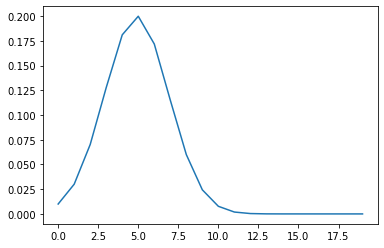

In [46]:
#Activation probability as a function of neuron index for a given stimulus
plt.plot(p_j_x[:,5])

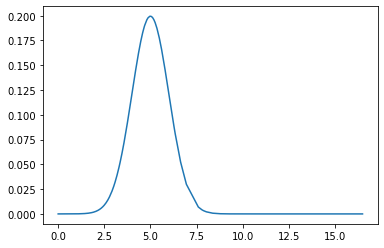

In [56]:
#Activation probability of neuron j as a function of stimulus x
j = 10
plt.plot(x_sorted,p_j_x[j,indices])

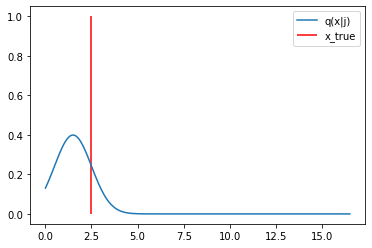

In [77]:
#Encoding-decoding processc
#Sotchastic sampling
j_sample = torch.distributions.categorical.Categorical(p_j_x[:,7]).sample()
#Definition of decoder distribution
q_x_j = torch.distributions.normal.Normal(mu[j_sample],sigma[j_sample])
plt.plot(x_sorted,torch.exp(q_x_j.log_prob(x_sorted)),label='q(x|j)')
plt.vlines(x_data[7],0,1,colors='red',label='x_true') 
plt.legend()
plt.show()

In [64]:
j_sample

tensor(6)